# Project on Boston House Prices dataset

This assessment will be completed using Python packages scipy, keras, and jupyter.

$$ Xc (4=7) $$

What is the main purpose of the project?

In [13]:
#Importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as ss
import tensorflow as tf 
import keras as kr


#Packages for visualisation purpose
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

In [14]:
#downloading the dataset
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()

In order to better understand the data and to be able later to justify my results the first section of this assignment will be based on me familiarizing myself with the Boston Housing Data. This will be evident through describing the dataset by code and demonstrating it features adn target variables. 

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

A Dataset derived from information collected by the U.S. Census Service in 1978 which describes housing in various suburbs of Boston, Massachusetts. 
The Boston Housing Dataset potrays the prices of houses in Boston. The dataset also consist of information such as:
- (CRIM) crime
- (ZN) residential land zone for lots larder than 25,000 sq.ft. 
- (INDUS) areas of non-retail business in the town
- (CHAS) Charles river dummy variable (track bounds river=1, otherwise 0)
- (NOX) nitric oxides concentration  
- (RM) number of rooms per house
- (AGE) the age of people who own the house
- (DIS) distance to five Boston employment centers
- (RAD) index of accessability to highways
- (TAX) full-value property-tax rate per 10,000 dollars
- (PTRATIO) pupil teacher ratio by town
- (B) people of African America descent by town
- (LSTAT) percentage lower status of the population
median value of woner-occupied homes in 1000s dollars



what was the purpose of making the dataset?

The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.

why have they only focused on those features?
https://www.ritchieng.com/machine-learning-project-boston-home-prices/

In [5]:
type(boston)

sklearn.utils.Bunch

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
data = boston.data
type(data)

numpy.ndarray

We can see the data is numpay array

In [8]:
#making a pandas dataframe 
data = pd.DataFrame(data = data, columns= boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
#including the price column as its not in the features
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#understanding the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


describe the data you see above here

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


The type of each column is a float there is a total of 14 columns with 506 entries.

https://www.youtube.com/watch?v=ZeM2tHtjGy4
    
keras 
https://www.youtube.com/watch?v=UJwK6jAStmg 

### Neural Network for Boston house prices dataset:

#### Introduction

Well-trained neural network should provide decent predictions of house prices based on the variable of the dataset. Good explanations of how to use the neural network and how it works.

Machine Learning represents a relatively new field in the world of computing that allows computers to perform abstract tasks and aproximate answers. Before this, computers could only be programmed to perform very specific tasks. Modern applications of machine learning can be seen absolutely everywhere from snapchat filters to cancer diagnoses to autonomous vehicles. 

Neural network is a system that is used to make predictions of outcomes when the system is presented with a number of inputs. The input and output variables must be correlated in some way as influence eachother. A neural net will start off with very poor proximation of the output but can be trained using training data to give more accurate results. Training data will contain both input and output data and the neural net will often use a process known as backpropagation to minimize errors. 

The term machine learning can be used to describe many different types of nueral networks. A common type of nueral network that is often used for introduction to machine learning is the multilayer perceptron which I will create in this notebook. 

Multilayer perceptron describes a neural network made of multiple layers; input layer, output layer and one or multiple hidden layers between input and output. Each layer contains several cells. The cells take inputs, multiply them by series of weights, add a bias, and passes the results to the next layer. At the end a number of outoups will be calculated. 

A technique called backpropagation is used to make the system more accurate. In this process training data is used and error is calculated after each training itteration. When the error is calculated the system will adjust the weights of the hidden layer cells to minimize the error.

<img src="MLP.png" style="width: 400px;">

#### Method

To start, first step is to determine the structure of the neural network. Structure is how many hidden layers and how many nuerons per layer (nodes).
Smaller and simpler neural nets train faster but may not be able to accurately predict outcomes of a more complex system.
A nueral network that is too deep (too many nodes and layers) may result in overfitting. Overfitting occurs when nueral network is so complex that it can very accurately predict the training data, but the structure is so complex it is not good at generalisation; an overfitted nueral net will be very accurate for training data but will not give accuarate results for new data.

training data 80%
validation data 20%
for the code: validation_split

relu provides faster training of the model vs sigmoid

def build_neural_net():
    net = kr.models.Sequential([
      net.add(kr.layers.Dense(32, activation='relu', input_shape=[13])),
      net.add(kr.layers.Dense(16, activation='relu')),
      net.add(kr.layers.Dense(1)),
  ])
    optimizer = tf.kr.optimizers.RMSprop(0.001)
    net.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', 'accuracy'])
    return net 

net = build_neural_net()

history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

In [216]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0, with sigmoid activation.
m.add(kr.layers.Dense(128, input_dim=13, activation="relu", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))

m.add(kr.layers.Dense(64, activation="relu", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))

m.add(kr.layers.Dense(1, activation="relu", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))

optimizer = tf.keras.optimizers.RMSprop(0.01)

# Compile the model.
m.compile(loss="mean_squared_error", optimizer=optimizer, metrics=['accuracy'])

In [217]:
history = m.fit(
    x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']],
    y = data['Price'],
    shuffle=True,
    epochs=500,
    batch_size=506,
    validation_split=0.2,
    verbose=0
)

In [218]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


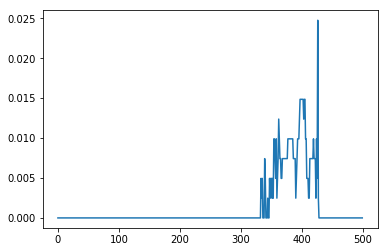

In [219]:
plt.plot(history.history['accuracy'])

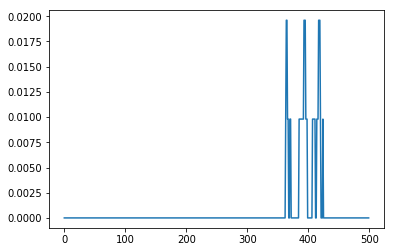

In [220]:
plt.plot(history.history['val_accuracy'])

refrence:
nueral net explanation - intro- https://skymind.ai/wiki/neural-network

https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

https://www.curiousily.com/posts/tensorflow-2-and-keras-quick-start-guide/

https://www.tensorflow.org/guide/keras/train_and_evaluate

explanation / defenitions of the code pararmeters used \https://keras.io/models/sequential/